In [1]:
import os, glob, time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline



# 取得檔名、建立meta檔

In [229]:
# 取得檔名
datapath = "/home/jovyan/Autoencoder/wolrdwide_lepidoptera_yolov4_cropped_and_padded_20210610/"
image_list = glob.glob(datapath + '/*.jpg')
print(len(image_list))    # 檢視影像數量 return 32,280

32262


In [230]:
img_Names = []
for i, img in enumerate(image_list ):
    img_Name = img.split('/')[-1]
    img_Names.append(img_Name) 
    print(f'i: {i:5d}, {100 * i / len(image_list) :.2f}%' ,end='\r')

In [12]:
df = pd.DataFrame(img_Names, columns=['Img_Name'])
df['Family'] = df.Img_Name.str.split('_').apply(lambda _ : _[0])
df['Subfamily'] = df.Img_Name.str.split('_').apply(lambda _ : _[1])
df['Genus'] = df.Img_Name.str.split('_').apply(lambda _ : _[2])
df['Species'] = df.Img_Name.str.split('_').apply(lambda _ : _[3])
df['SciName'] = df.Img_Name.str.split('_').apply(lambda _ : _[2] + ' ' + _[3] )
df['Number'] = df.Img_Name.str.split('_').apply(lambda _ : _[4])
df['Source'] = df.Img_Name.str.split('_').apply(lambda _ : _[5])
# df['SourceID'] = df.Img_Name.str.split('_').apply(lambda _ : _[6] + '_' + _[7])

# df.iloc[:,1:].to_csv('wolrdwide_lepidoptera_meta_20210610.csv', index=False)

# 建立科名encoing的字典對照表 
fam_dict = dict(zip(np.sort(df.Family.unique()), range(97) ))           # 依科名英文字母順序建立編碼
df['Family_encode'] = [fam_dict[f] for f in df.Family]

# 建立科名encoing的字典對照表 - YY版本 (按照字母順續編排，與fam_dict相同)
# worldwide_family = np.load('worldwide_family_arr_20210610.npy', allow_pickle=True) 
# fam_dict_YY = dict(zip(worldwide_family, range(97) ))                  # 依YY檔案建立科名排序編碼
# df['Family_encodeYY'] = [fam_dict_YY[f] for f in df.Family]

#　計算各科樣本數量
# family_count = f_meta.groupby('Family').Species.agg(np.size).rename("F_sample")
# f_meta = pd.merge(f_meta, family_count, on="Family" ) 
f_NSample = df.groupby(['Family']).SciName.count().rename("Fam_Sample")    # 計算各科樣本數量
f_NSpecie = df.groupby(['Family']).SciName.nunique().rename("Fam_Specie")  # 計算各科物種數量
df_ = pd.merge(f_NSample, f_NSpecie, on='Family')
df = pd.merge(df, df_, on="Family" , how='left')

df.iloc[:,1:].to_csv(f'moth_meta_20210610.csv', index=False)

#### 建立Subfamily版本的metadata

In [238]:
df = pd.DataFrame(img_Names, columns=['Img_Name'])
df['Family'] = df.Img_Name.str.split('_').apply(lambda _ : _[0])
df['Subfamily'] = df.Img_Name.str.split('_').apply(lambda _ : _[1])
df['Genus'] = df.Img_Name.str.split('_').apply(lambda _ : _[2])
df['Species'] = df.Img_Name.str.split('_').apply(lambda _ : _[3])
df['SciName'] = df.Img_Name.str.split('_').apply(lambda _ : _[2] + ' ' + _[3] )
df['Number'] = df.Img_Name.str.split('_').apply(lambda _ : _[4])
df['Source'] = df.Img_Name.str.split('_').apply(lambda _ : _[5])

# 建立 科-亞科名欄位
df["F_Subfamily"] = df.Family + "_" + df.Subfamily

# 建立亞科名encoing的字典對照表 
size = df.F_Subfamily.unique().size
subfam_dict = dict(zip(np.sort(df.F_Subfamily.unique()), range(size) ))           # 依科名英文字母順序建立編碼
df['F_Subfamily_encode'] = [subfam_dict[f] for f in df.F_Subfamily]
f_NSample = df.groupby(['F_Subfamily']).SciName.count().rename("SubFam_Sample")    # 計算各科樣本數量
f_NSpecie = df.groupby(['F_Subfamily']).SciName.nunique().rename("SubFam_Specie")  # 計算各科物種數量
df_ = pd.merge(f_NSample, f_NSpecie, on='F_Subfamily')
df = pd.merge(df, df_, on="F_Subfamily" , how='left')
df.iloc[:,1:].to_csv(f'moth_meta_subfamily_20210610.csv', index=False)

# 資料探索

In [3]:
moth_meta = pd.read_csv(f'moth_meta_20210610.csv')
# moth_meta['ImgPath'] = image_list
moth_meta

,Family,Subfamily,Genus,Species,SciName,Number,Source,Family_encode,Fam_Sample,Fam_Specie
0,Notodontidae,Phalerinae,Datana,perspicua,Datana perspicua,2432375495,CSU,60,741,530
1,Geometridae,Ennominae,Borbacha,pardaria,Borbacha pardaria,A37-20180907-057,TESRI,34,4684,3138
2,Geometridae,Ennominae,Cleora,fraterna,Cleora fraterna,A34-20130506-024,TESRI,34,4684,3138
3,Tortricidae,Olethreutinae,Olethreutes,osmundana,Olethreutes osmundana,1838875462,MISSA,84,938,802
4,Geometridae,Geometrinae,Hemistola,monotona,Hemistola monotona,A52-20160704-154,TESRI,34,4684,3138
...,...,...,...,...,...,...,...,...,...,...
32257,Tineidae,Tineinae,Tinea,occidentella,Tinea occidentella,2432338673,CSU,82,102,85
32258,Geometridae,Geometrinae,Episothalma,robustaria,Episothalma robustaria,1826442741,NHMUK,34,4684,3138
32259,Oecophoridae,Depressariinae,Eupragia,hospita,Eupragia hospita,1585226502,MISSA,62,70,65
32260,Nymphalidae,Limenitidinae,Neptis,hylas,Neptis hylas,1039028551,YPM,61,3999,1655


In [11]:
# 檢視各分類層級數量
print('Family \t:', moth_meta.Family.unique().size)
print('Subfamily:', moth_meta.Subfamily.unique().size)
print('Genus \t:', moth_meta.Genus.unique().size)
print('Species\t:', moth_meta.SciName.unique().size)


Family 	: 90
Subfamily: 245
Genus 	: 4921
Species	: 17186


In [18]:
# 檢視各科的樣本數
moth_meta_byFamily = moth_meta.pivot_table('Number', index=['Family'], aggfunc='count').sort_values('Number')[::-1]    # 各科樣本數
moth_meta_byFamily["Cumsum%"] = np.round(100*moth_meta_byFamily.cumsum() / 32261, 2)
moth_meta_byFamily[:20]

,Number,Cumsum%
Family,,
Erebidae,5150,15.96
Geometridae,4684,30.48
Nymphalidae,3999,42.88
Noctuidae,3700,54.35
Pieridae,3082,63.90
Hesperiidae,1463,68.44
Lycaenidae,1283,72.41
Crambidae,1196,76.12
Papilionidae,1096,79.52


In [16]:
# 檢視各物種的樣本數
moth_meta.pivot_table('Number', index=['SciName'], aggfunc='count').sort_values('Number')[::-1]  # 各物種樣本數

,Number
SciName,
Anthocharis sara,12
Plutella xylostella,11
Pieris napi,11
Gonepteryx rhamni,10
Ornithoptera goliath,10
...,...
Jativa castanealis,1
Jankowskia athleta,1
Jamides bochus,1


Species sample size is 1 : 8066


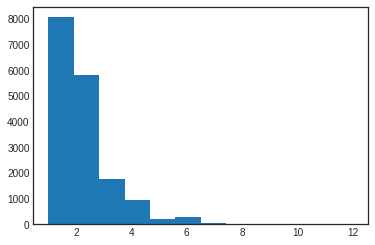

In [15]:
# 檢視各物種樣本數
sp_n = moth_meta.groupby(by='SciName').SciName.count().sort_values()[::-1]  # 計算各種的樣本數
print('Species sample size is 1 :', sum(sp_n==1))  # 有8067個物種樣本數為1
plt.hist(sp_n, bins=12);

### 檢視科層級資料

In [158]:
df_family = moth_meta.groupby(["Family"])[["Subfamily","Genus","SciName", "Number"]].nunique()
print(df_family.sum())
df_family.describe()

Subfamily      300
Genus         4921
SciName      17186
Number       24587
dtype: int64


,Subfamily,Genus,SciName,Number
count,90.000000,90.000000,90.000000,90.000000
mean,3.333333,54.677778,190.955556,273.188889
std,3.920559,143.043234,529.944854,771.817582
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,4.000000
50%,2.000000,4.000000,11.500000,17.000000
75%,3.750000,24.500000,64.750000,82.750000
max,22.000000,821.000000,3138.000000,4446.000000


### 檢視亞科層級資料

In [225]:
moth_meta["F_Subfamily"] = moth_meta.Family + "_" + moth_meta.Subfamily
df_fsubfamily = moth_meta.groupby(["F_Subfamily"])[["Genus","SciName", "Number"]].nunique()
print(df_fsubfamily.sum())
df_fsubfamily.describe()

Genus       4923
SciName    17186
Number     24598
dtype: int64


,Genus,SciName,Number
count,300.000000,300.000000,300.000000
mean,16.410000,57.286667,81.993333
std,41.516188,154.173786,222.358324
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000
50%,3.000000,8.000000,12.000000
75%,12.000000,37.000000,54.000000
max,446.000000,1618.000000,2286.000000


In [228]:
df_fsubfamily

,Genus,SciName,Number
F_Subfamily,,,
Acanthopteroctetidae_Unassigned,1,1,1
Adelidae_Adelinae,3,16,26
Adelidae_Nematopogoninae,1,6,7
Agonoxenidae_Parametriotinae,1,1,3
Alucitidae_Unassigned,2,5,5
...,...,...,...
Ypsolophidae_Ochsenheimeriinae,1,2,2
Ypsolophidae_Ypsolophinae,2,12,14
Zygaenidae_Chalcosiinae,13,16,31


Species < 3 by  Family_Subfamily : 87
Species > 8 by  Family_Subfamily : 146


F_Subfamily
Geometridae_Ennominae        1618
Noctuidae_Noctuinae          1123
Geometridae_Larentiinae       872
Erebidae_Arctiinae            775
Pieridae_Pierinae             633
Erebidae_Erebinae             567
Tortricidae_Olethreutinae     516
Nymphalidae_Satyrinae         342
Noctuidae_Cuculliinae         331
Papilionidae_Papilioninae     327
Erebidae_Ctenuchinae          324
Hesperiidae_Hesperiinae       315
Geometridae_Sterrhinae        313
Geometridae_Geometrinae       281
Tortricidae_Tortricinae       278
Lycaenidae_Theclinae          265
Nymphalidae_Heliconiinae      263
Crambidae_Spilomelinae        260
Notodontidae_Unassigned       255
Pyralidae_Phycitinae          237
Nymphalidae_Nymphalinae       216
Nymphalidae_Limenitidinae     207
Lycaenidae_Polyommatinae      206
Gelechiidae_Gelechiinae       201
Erebidae_Lymantriinae         194
Nymphalidae_Charaxinae        193
Sphingidae_Macroglossinae     176
Erebidae_Lithosiinae          168
Erebidae_Catocalinae          165
Pi

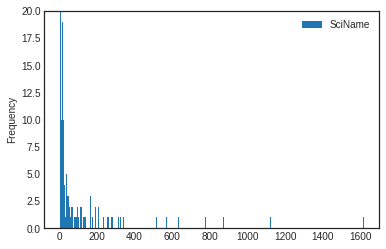

In [245]:
print("Species < 3 by  Family_Subfamily :" , df_fsubfamily[df_fsubfamily.SciName < 3].index.size)
print("Species > 8 by  Family_Subfamily :" , df_fsubfamily[df_fsubfamily.SciName > 8].index.size)
df_fsubfamily.plot(y=["SciName"], kind="hist", bins=500 ,ylim=(0,20));
df_fsubfamily.SciName.sort_values()[::-1][:30]

In [227]:
# 檢視各科包含多少亞科(包含uUnassigned)
# 科-亞科包含uUnassigned)共有300類
df = moth_meta.groupby(["Family"]).Subfamily.nunique().sort_values()[::-1]
print("Total Subfamily under Family(includind 'Unassigned') : ", df.sum())
print(df[:1])

print("="*50)
mask = moth_meta.Subfamily != "Unassigned"
df = moth_meta[mask].groupby(["Family"]).Subfamily.nunique().sort_values()[::-1]
print("Total Subfamily under Family : ", df.sum())
print(df[:10])

Total Subfamily under Family(includind 'Unassigned') :  300
Family
Noctuidae    22
Name: Subfamily, dtype: int64
Total Subfamily under Family :  253
Family
Noctuidae       22
Erebidae        17
Nymphalidae     15
Crambidae       14
Tineidae        12
Geometridae      9
Saturniidae      9
Notodontidae     9
Nolidae          8
Gelechiidae      8
Name: Subfamily, dtype: int64


In [100]:
# 檢視 subfamily unassigned 
mask = moth_meta.Subfamily == 'Unassigned'
print("Size for Subfamily unassigned by sample : " , moth_meta[mask].Number.count())  # n =588
subfamily_unassigned = moth_meta[mask].groupby(["Family","Genus"])[["SciName", "Number"]].nunique().reset_index()
print("Size for Subfamily unassigned by Family : " , subfamily_unassigned.Family.nunique())
print("Size for Subfamily unassigned by Genus : " , subfamily_unassigned.Genus.nunique())
print("Size for Subfamily unassigned by Species : " , subfamily_unassigned.SciName.sum())
# print("Size for Subfamily unassigned by Samples : " , subfamily_unassigned.Number.sum())
subfamily_unassigned

Size for Subfamily unassigned by sample :  588
Size for Subfamily unassigned by Family :  47
Size for Subfamily unassigned by Genus :  202
Size for Subfamily unassigned by Species :  490


,Family,Genus,SciName,Number
0,Acanthopteroctetidae,Acanthopteroctetes,1,1
1,Alucitidae,Alucita,4,4
2,Alucitidae,Pterotopteryx,1,1
3,Autostichidae,Glyphidocera,1,1
4,Batrachedridae,Batrachedra,4,4
...,...,...,...,...
197,Tineidae,Thisizima,1,1
198,Tineidae,Xylesthia,2,2
199,Tischeriidae,Coptotriche,2,2
200,Xyloryctidae,Cryptophasa,1,1


In [171]:
# 檢視 亞科名在不同科之間有重覆的
df =  moth_meta.groupby(['Subfamily']).Family.nunique().sort_values()[::-1]
df[df>1]  # 不包含"Unassigned"，有9個亞科名重覆

Subfamily
Unassigned         47
Depressariinae      2
Acontiinae          2
Nemeobiinae         2
Yponomeutinae       2
Lyonetiinae         2
Epipleminae         2
Oecophorinae        2
Spilomelinae        2
Parametriotinae     2
Name: Family, dtype: int64

### note
- 改用亞科時，是否該包含unassigned的資料?  
  - 若去掉Unassigned的亞科，則資料少588筆(裡面包含47科、202屬、490種的資料)
- 注意: 有些亞科名在不同科之間有重覆
- 要將亞科資料組合成 family_subfamily 否則會導致部分重疊的亞科名干擾結果
  

## 指定物種顯示原始影像

In [ ]:
import os, time, random, glob
import torch
import numpy as np 
import pandas as pd
# import PIL
import skimage.io
import skimage.transform
from torch import nn
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms 
from torch.autograd import Variable
import torchvision 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class ImgDataset(Dataset):
    '''簡單用來抽樣看原始圖檔的Dataset
        X: ImagePath
        y: Imagelabel(Family, Genus ,Specie Name etc...)
    '''
    def __init__(self, X, y):
        self.ImgNames  = np.asarray(X)                # 輸入的X 為影像完整路徑的list、y則為完整的科名list 
        self.labels = np.asarray(y)
        self.to_tensor = transforms.ToTensor()        # 將取值範圍為[0, 255]的PIL.Image或形狀為[H, W, C]的numpy.ndarray，轉換成形狀為[C, H, W]，取值範圍是[0, 1.0]的torch.FloadTensor
#         self.transform = transforms.Compose([       # 影像必須用PIL開啟才能使用transforms.Compose等系列操作
#             transforms.Resize(size=(128, 128)),
#             transforms.ToTensor()
#         ])
        
    def __getitem__(self, index):
        img_Name = self.ImgNames[index]
#         image = PILImage.open(img_Name)                #  PIL Image讀讀取影像的通道為(c,w,h)
        image = skimage.io.imread(img_Name)              #  skimage.io讀取影像的通道為(w,h,c)，to_tensor會自動調整  
        image = skimage.transform.resize(image, (128,128))
        image = self.to_tensor(image)                    # 根據檔名開啟影像。得到image.jpg的物件，並轉為Tensor
        label  = self.labels[index]
        return image, label
    
    def __len__(self):
        return len(self.labels)
    
    # help to get images for visualizing
    def getbatch(self, indices):
        images = []
        labels = []
        for index in indices:
            image, label = self.__getitem__(index)
            images.append(image)
            labels.append(label)
        return torch.stack(images), labels

# 一次預讀取讀取所有影像 
# X = moth_meta.ImgPath
# y = moth_meta.Family
# img_set = ImgDataset(X=X, y=y)

In [23]:
## 指定物種顯示原始影像

# X = moth_meta.ImgPath
# y = moth_meta.Family
# img_set = ImgDataset(X=X, y=y)

# specie = 'Anthocharis sara'
# img_indices =  moth_meta[moth_meta.SciName == specie].index

# images ,labels = img_set.getbatch(img_indices)
# family_ = np.unique(labels).item()
# im_convert(torchvision.utils.make_grid(images, nrow=6), f_name= f'{family_}_{specie}', subtitle=len(y), save=False)